In [67]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler	
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [68]:
train = pd.read_csv("train_agriculture (1).csv")
test = pd.read_csv("test_agriculture.csv")

In [69]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [70]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(4599, 11) (1199, 10) (5798, 11)


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
 10  source                   5798 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 498.4+ KB


In [72]:
data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
source                        0
dtype: int64

In [73]:
#fill missing values with mean
data=data.fillna(data.mean())

In [74]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,train


In [75]:
data.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
5793,F00003133,1132,0,1,2,40,34.000000,7,3,0.19439,test
5794,F00003135,1132,0,1,2,40,25.000000,3,1,0.19439,test
5795,F00003138,1132,0,1,2,20,13.000000,23,1,0.19439,test
5796,F00003149,1212,0,1,2,10,35.000000,5,1,0.19439,test
5797,F00003150,1212,0,1,2,15,28.920374,20,3,0.19439,test


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5798 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              5798 non-null   float64
 10  source                   5798 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 498.4+ KB


In [77]:
# label encoding the data 
from sklearn import preprocessing

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'ID'. 
data['ID']= label_encoder.fit_transform(data['ID'])

In [78]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,0,188,1,0,1,0,0.0,0,1,0.0,train
1,2,209,1,0,1,0,0.0,0,2,1.0,train
2,3,257,1,0,1,0,0.0,0,2,1.0,train
3,4,257,1,1,1,0,0.0,0,2,1.0,train
4,5,342,1,0,1,0,0.0,0,2,1.0,train


Text(0, 0.5, 'Aanalysis crop damage')

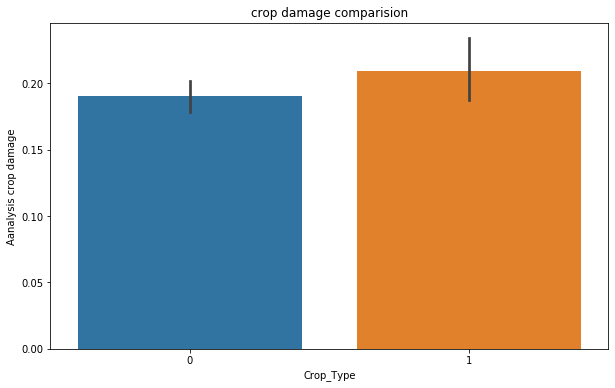

In [79]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))
# Add title
plt.title("crop damage comparision")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data['Crop_Type'], y=data['Crop_Damage'])

# Add label for vertical axis
plt.ylabel("Aanalysis crop damage")

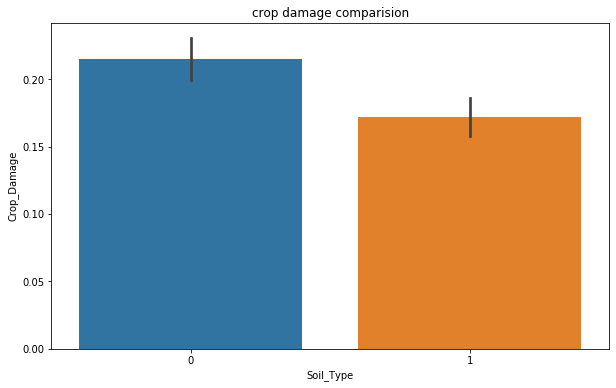

In [80]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))
# Add title
plt.title("crop damage comparision")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data['Soil_Type'], y=data['Crop_Damage'])

# Add label for vertical axis

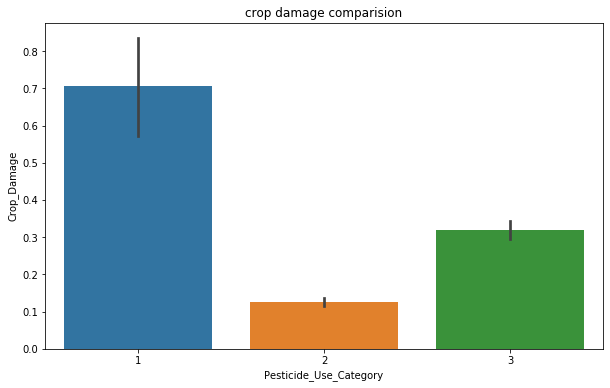

In [81]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))
# Add title
plt.title("crop damage comparision")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data['Pesticide_Use_Category'], y=data['Crop_Damage'])

# Add label for vertical axis

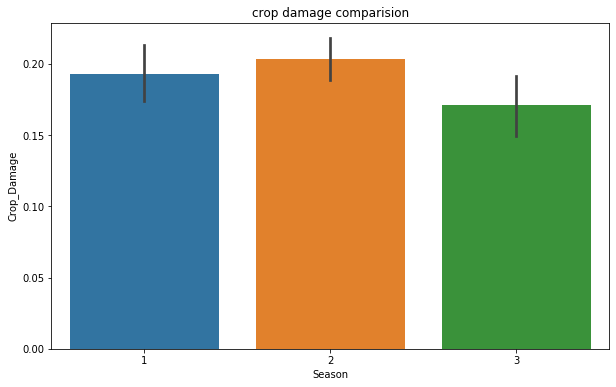

In [82]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))
# Add title
plt.title("crop damage comparision")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data['Season'], y=data['Crop_Damage'])

# Add label for vertical axis

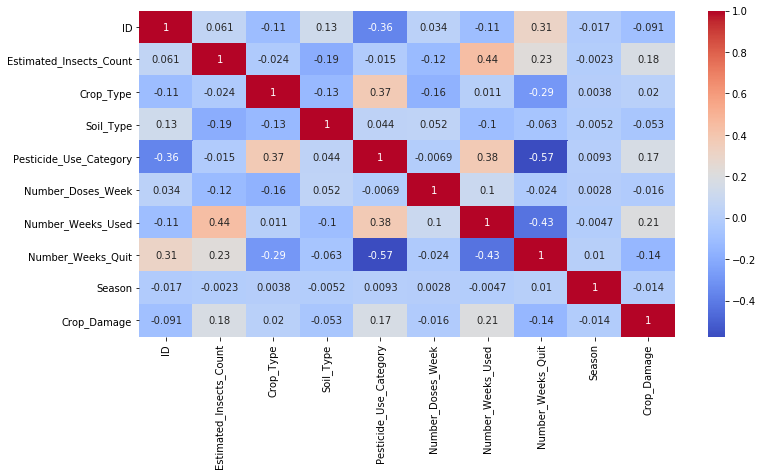

In [83]:

plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [89]:
import warnings
warnings.filterwarnings('ignore')


#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [90]:
# Reading modified data
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [91]:
#Separating Feature and Target matrices
X = train2.drop(['Crop_Damage'], axis=1)
y=train2['Crop_Damage']

In [92]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [93]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)


In [94]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [95]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

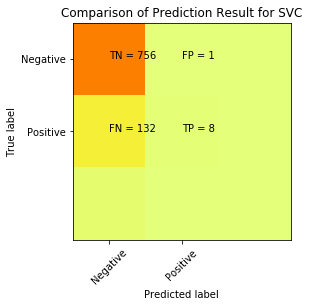

Accuracy of the Model SVC 83.0%


In [96]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "SVC"
model=SVC() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

# cross val input to check overfitting

In [97]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X_train,y_train,cv=10)
score,score.mean()

(array([0.83967391, 0.83695652, 0.83423913, 0.82880435, 0.8423913 ,
        0.8423913 , 0.83423913, 0.83695652, 0.83423913, 0.83651226]),
 0.8366403565928208)

# from the above observation very less overfitting occurs and model is good

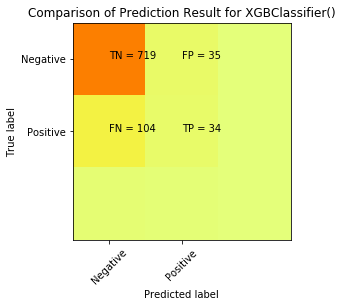

Accuracy of the Model XGBClassifier() 82.0%


In [98]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

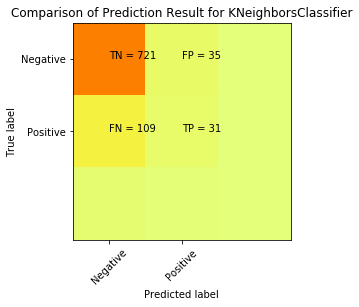

Accuracy of the Model KNeighborsClassifier 81.7%


In [99]:
from sklearn.neighbors import KNeighborsClassifier  #Import packages related to Model
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


In [100]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X_train,y_train,cv=10)
score,score.mean()

(array([0.79891304, 0.82336957, 0.81793478, 0.79619565, 0.83423913,
        0.83423913, 0.79347826, 0.80978261, 0.80434783, 0.81743869]),
 0.8129938692098092)

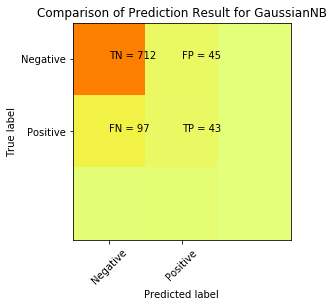

Accuracy of the Model GaussianNB 82.1%


In [101]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

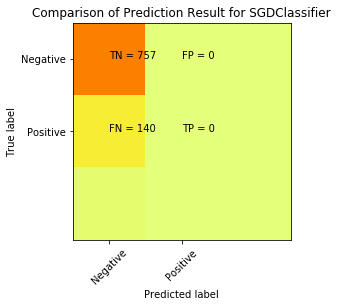

Accuracy of the Model SGDClassifier 82.3%


In [102]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


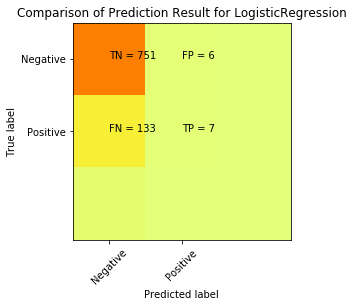

Accuracy of the Model LogisticRegression 82.4%


In [103]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

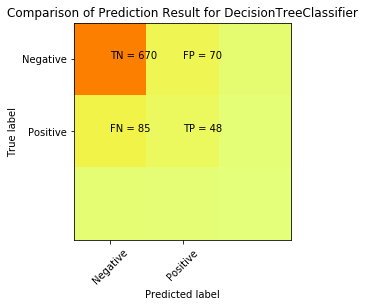

Accuracy of the Model DecisionTreeClassifier 78.0%


In [104]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)


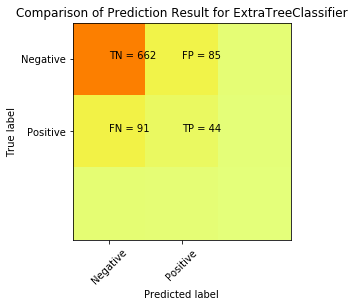

Accuracy of the Model ExtraTreeClassifier 76.8%


In [105]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

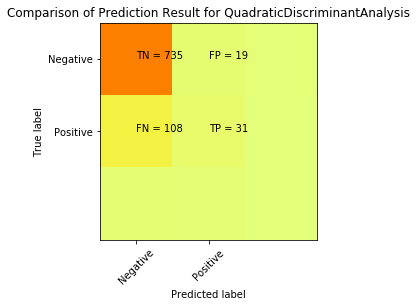

Accuracy of the Model QuadraticDiscriminantAnalysis 83.3%


In [106]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "QuadraticDiscriminantAnalysis"
model = QuadraticDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

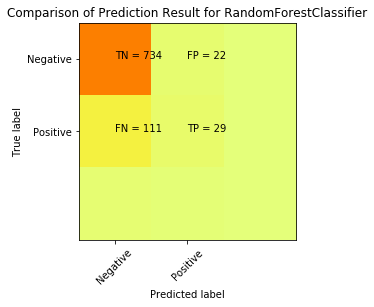

Accuracy of the Model RandomForestClassifier 82.9%


In [107]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

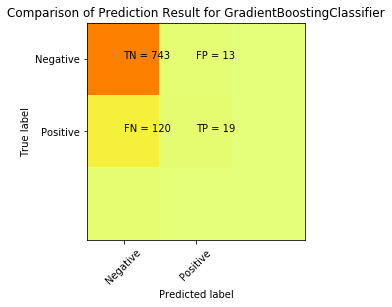

Accuracy of the Model GradientBoostingClassifier 82.9%


In [108]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

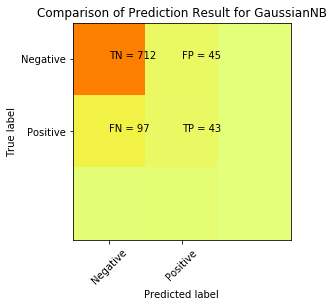

Accuracy of the Model GaussianNB 82.1%


In [109]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

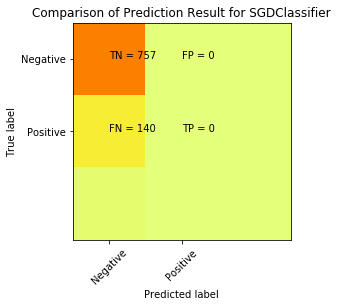

Accuracy of the Model SGDClassifier 82.3%


In [110]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

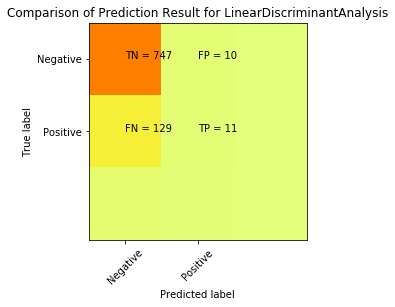

Accuracy of the Model LinearDiscriminantAnalysis 82.4%


In [111]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

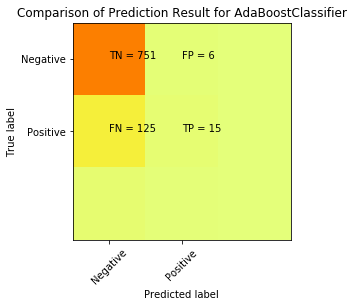

Accuracy of the Model AdaBoostClassifier 83.3%


In [112]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

# adaboost classifier gives best accuracy

In [113]:
y_pred = model.predict(X_test)
y_pred

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [114]:

# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.832293 using {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
0.745403 (0.018048) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.745403 (0.018048) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.797681 (0.012693) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.781827 (0.015912) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.814806 (0.010940) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.798497 (0.015948) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.822328 (0.011984) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.808011 (0.015233) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.828940 (0.010982) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.816709 (0.015092) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.830481 

In [115]:
y_pred = grid_result.predict(X_test)
        
y_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# save model

In [116]:
from joblib import dump,load

In [117]:
dump(grid_result,'KneighboursClassifier.joblib')

['KneighboursClassifier.joblib']